###                                    HOSPITAL DATA ANALYSIS

In [37]:
import pandas as pd

# Load in data fron csv
health_data = pd.read_csv(r"C:\Users\murie\Downloads\Health Dataset Python\Health_dataset.csv")

#Display the first few rows
print(health_data.head()) 

  Patient ID  Gender       Disease         Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis          Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria          Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria           Surgery  City General Hospital   
3  PAT-00004    Male        Asthma          Dialysis  City General Hospital   
4  PAT-00005  Female      Diabetes  Physical Therapy  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     2022-12-19     2023-01-16        Recovered            NaN    1973-06-05  
1     2023-03-29     2023-04-21        Recovered            NaN    1998-11-21  
2     2022-09-16     2022-10-15        Recovered            NaN    1942-02-14  
3     2022-02-07     2022-02-11        Recovered            NaN    1943-01-17  
4     2022-10-25     2022-10-30        Recovered            NaN    1979-07-28  


### What is the total number of Patients

In [2]:
#Count the total number of patients
total_records = health_data.shape[0]


#What is the total  number of patients?
print("Total Patients", total_records)

Total Patients 8000


### How is the Patient Population distributed by gender

In [3]:
#How is the patient population distributed by gender?
gender_count = health_data['Gender'].value_counts()
print('Gender Distribution:')
print(gender_count)

Gender Distribution:
Gender
Male      5206
Female    2794
Name: count, dtype: int64


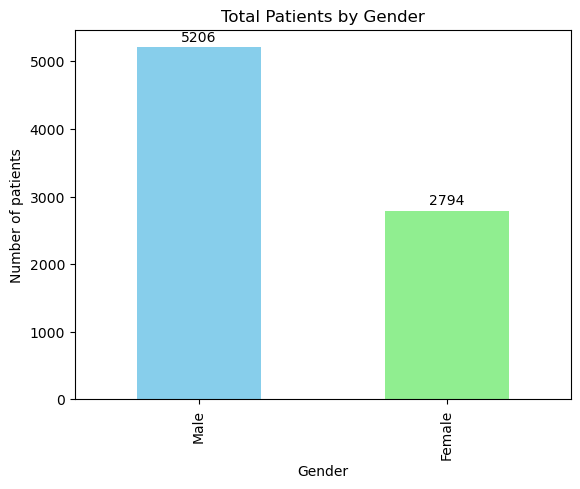

In [40]:
#Visualization of  gender distribution
#Adding Data label
import matplotlib.pyplot as plt
ax = gender_count.plot(kind='bar',color=['skyblue','lightgreen'])

plt.title('Total Patients by Gender')
plt.ylabel('Number of patients')


#label part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
    xy=(bar.get_x() + bar.get_width()/2, height),
    xytext =(0,2),
    textcoords = "offset points",
    ha = 'center',
    va = 'bottom'
    )
plt.show()

### Patient age group by total visit

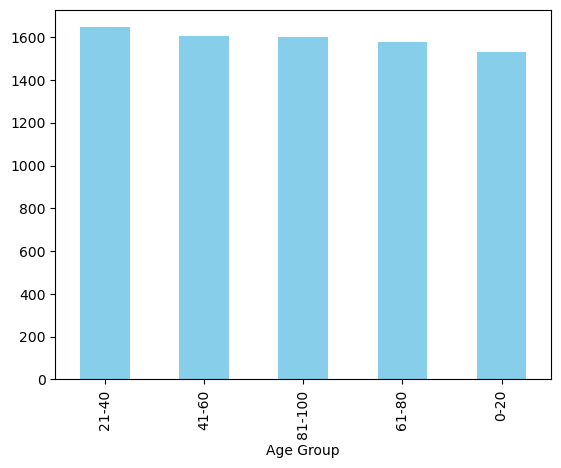

In [6]:

#Convert the Admission date and Date of birth to proper date format
health_data['Admission Date']=pd.to_datetime(health_data['Admission Date'])
health_data['Date of Birth']=pd.to_datetime(health_data['Date of Birth'])

#Calculate the patients age as of the time of Admission in year
health_data['Age']=(health_data['Admission Date'] - health_data['Date of Birth']).dt.days/365.25
health_data['Age']=health_data['Age'].astype(int)
#print(health_data['Age'])

#Define age bins
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','81-100']

#create an age group using the bins var defined
health_data['Age Group']= pd.cut(health_data['Age'],bins=bins, labels=labels, right=False)

#count the number of patients in each age group
age_count = health_data['Age Group'].value_counts()

#Visualize the age group
ax = age_count.plot(kind='bar' , color='skyblue')


### Which diseases are most commonly diagnosed among the patients?

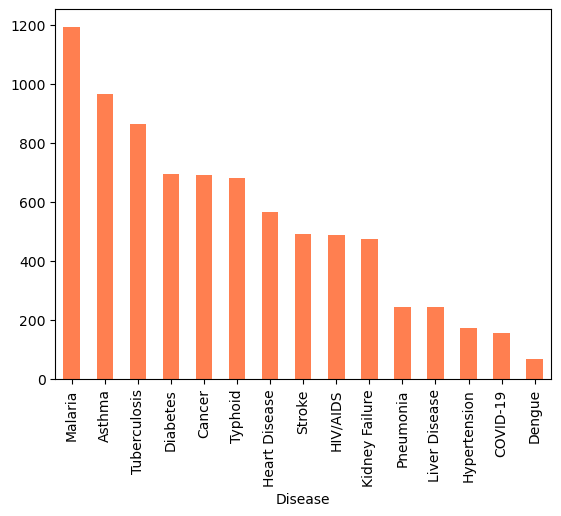

In [7]:
disease_counts = health_data['Disease'].value_counts()
#print(disease_counts)
ax=disease_counts.plot(kind='bar',color='coral')

In [8]:
#Get the top 3 diagnosed diseases
disease_count = health_data['Disease'].value_counts().nlargest(3)
print(disease_count)

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [9]:
dynamictop = 3
disease_count = health_data['Disease'].value_counts().nlargest(dynamictop)
total_top = disease_count.sum()
format_value = "{:,}".format(total_top)
description =f"Total count of the {dynamictop} most common diseases:"
print(description, format_value)

Total count of the 3 most common diseases: 3,023


In [10]:
#Get the top 3 diagnosed diseases percentage of grand total
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseases_count = health_data['Disease'].value_counts().sum()
percentage= (disease_counttop3/total_diseases_count) * 100
roundpercentage =percentage.round(0).astype(int)

for disease, pct in roundpercentage.items():
    print(f"{disease}: {pct}%")


Malaria: 15%
Asthma: 12%
Tuberculosis: 11%


In [11]:
#Get the top 3 diagnosed diseases percentage 
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
top3_diseases_count = disease_counttop3.sum()
pcttop3 = (disease_counttop3/top3_diseases_count)*100

roundpct =pcttop3.round(0).astype(int)

for disease , pct in roundpct.items():
    print(f"{disease}: {pct}%")


Malaria: 39%
Asthma: 32%
Tuberculosis: 29%


### Are certain diseases more prevalent in one gender than the other?

In [12]:
gender_disease = pd.crosstab(health_data['Disease'],health_data['Gender'])
print("Diseases that are common among genders")
print(gender_disease)

Diseases that are common among genders
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


### Calculate the duration of each patient stay and create a group to show numbers of patients in each group

In [13]:
#Convert date in proper date format
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Discharge Date'] = pd.to_datetime(health_data['Discharge Date'])

health_data['Stay Duration'] = (health_data['Discharge Date'] - health_data['Admission Date']).dt.days
print(health_data[['Admission Date','Discharge Date','Stay Duration']].head(5))

  Admission Date Discharge Date  Stay Duration
0     2022-12-19     2023-01-16             28
1     2023-03-29     2023-04-21             23
2     2022-09-16     2022-10-15             29
3     2022-02-07     2022-02-11              4
4     2022-10-25     2022-10-30              5


##### Group Stay Duration

In [14]:
bins = [-1,0,3,7,14, float('inf')]
labels = ["Same Day" ,"1-3 Days","4-7 Days","8-14 Days","Above 21 Days"]
health_data['Stay Bucket']=pd.cut(health_data['Stay Duration'],bins=bins,labels=labels, right=True)
print(health_data['Stay Bucket'])

0       Above 21 Days
1       Above 21 Days
2       Above 21 Days
3            4-7 Days
4            4-7 Days
            ...      
7995         4-7 Days
7996    Above 21 Days
7997        8-14 Days
7998    Above 21 Days
7999    Above 21 Days
Name: Stay Bucket, Length: 8000, dtype: category
Categories (5, object): ['Same Day' < '1-3 Days' < '4-7 Days' < '8-14 Days' < 'Above 21 Days']


##### Number of patients on each Group

In [15]:
total_group_patient = health_data['Stay Bucket'].value_counts()
print(total_group_patient)

Stay Bucket
Above 21 Days    4269
8-14 Days        1837
4-7 Days         1087
1-3 Days          807
Same Day            0
Name: count, dtype: int64


##### Create chart to visualize it

<Axes: title={'center': 'Total Patients by Length of Stay'}, xlabel='Stay Bucket'>

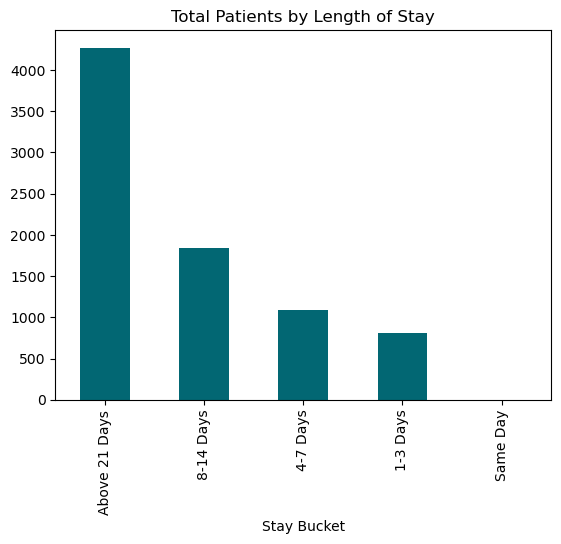

In [16]:
#import matplotlib.pyplot
plt.title('Total Patients by Length of Stay')
total_group_patient.plot(kind='bar', color =['#026773'])

### Analyze Pattern to identify Risk Factor for any records with a recorded course of death

In [17]:
#filter records where cause of death is not empty
death_cause = health_data.dropna(subset='Cause of Death')
count_cause = death_cause['Cause of Death'].value_counts()
print('Most common cause of death')
print(count_cause)

Most common cause of death
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


##### Visualize the finding

Text(0.5, 1.0, 'Top causes of Death')

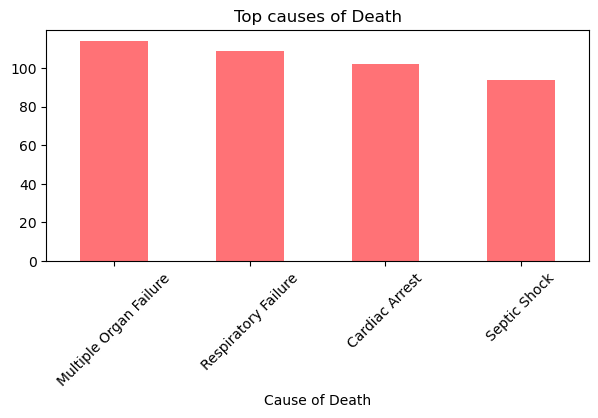

In [18]:
plt.figure (figsize = (7,3))
count_cause.plot(kind='bar', color='#FF7276')
plt.xticks(rotation=45)
plt.title('Top causes of Death')

### What are the percentages of the following Patients ; Deceased , Under Treatment Recovered

In [19]:
#Total patients
total_Patients= health_data.shape[0]
print(f"Total Patients :",total_Patients)

Total Patients : 8000


In [20]:
#Total Death patients"
total_death = (health_data['Treatment Status'].str.lower() == 'deceased').sum()
#percentage of deceased
death_rate = (total_death / total_Patients) * 100 if total_Patients>0 else 0
death_rate
print(f"total death cases",total_death)
print(f"total death percentage",death_rate)

total death cases 419
total death percentage 5.2375


In [21]:
#Total Recovered Patients
total_recovered = (health_data['Treatment Status'].str.lower() == 'recovered').sum()
#percentage of recovered patients
recovered_rate = (total_recovered / total_Patients) * 100 if total_Patients>0 else 0
death_rate
print(f"total recovered cases",total_recovered)
print(f"total recovered percentage",recovered_rate)

total recovered cases 6819
total recovered percentage 85.2375


In [22]:
#Total UnderTreatment Patients
under_treatment = 100-(recovered_rate+death_rate)
print(f'total rate of cases under_treatment',under_treatment)

total rate of cases under_treatment 9.525000000000006


In [23]:
#Show this as dought chat
print(f"total recovery rate :",recovered_rate)
print(f"total casuality rate :",death_rate)
print(f"total treatment rate :",under_treatment)

total recovery rate : 85.2375
total casuality rate : 5.2375
total treatment rate : 9.525000000000006


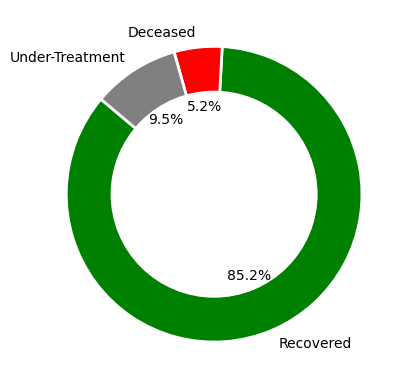

In [24]:
labels = ['Recovered','Deceased','Under-Treatment']
sizes =[recovered_rate,death_rate,under_treatment]
colors =['green','red','grey']
plt.Figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors,startangle=140, wedgeprops={'edgecolor':'white','linewidth':2})
plt.gca().add_artist(plt.Circle((0,0),0.70, fc='white'))
plt.show()

### What are the peak days of the week on a monthly bases for admissions and discharges

##### Admission Peaks

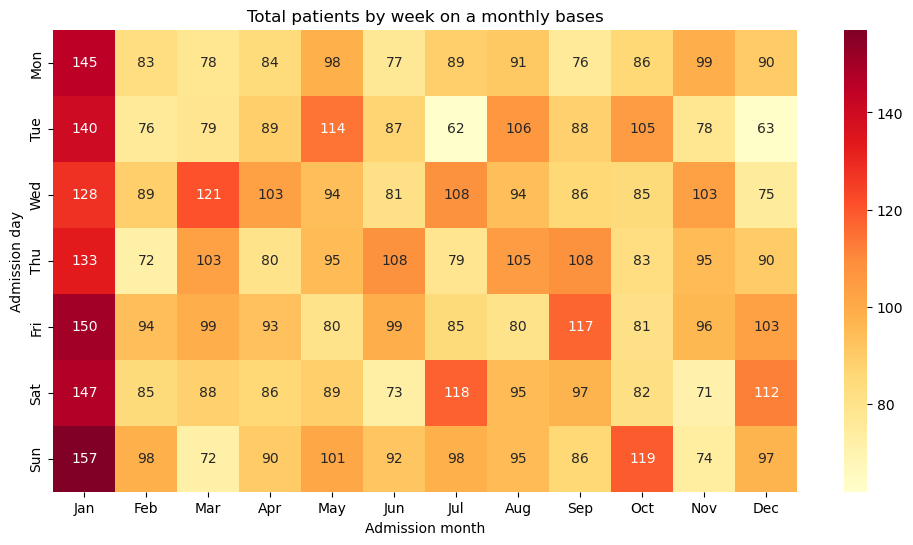

In [25]:
import seaborn as sns
#extract the short day and month name
health_data['Admission month'] = health_data['Admission Date'].dt.strftime('%b')
health_data['Admission day'] = health_data['Admission Date'].dt.strftime('%a')

#Define proper order for month and abbreviated days

month_order = [
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

#Create a pivot table
admission_heatmap = health_data.pivot_table(
    index = 'Admission day',
    columns = 'Admission month',
    aggfunc = 'size',
    fill_value = 0
)
#correct reordr of heat map
admission_heatmap_sorted = admission_heatmap.reindex(index = day_order, columns =month_order)

#Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(admission_heatmap_sorted,annot=True, fmt='d' , cmap="YlOrRd")
plt.title('Total patients by week on a monthly bases')
plt.show()

##### Discharge Peaks

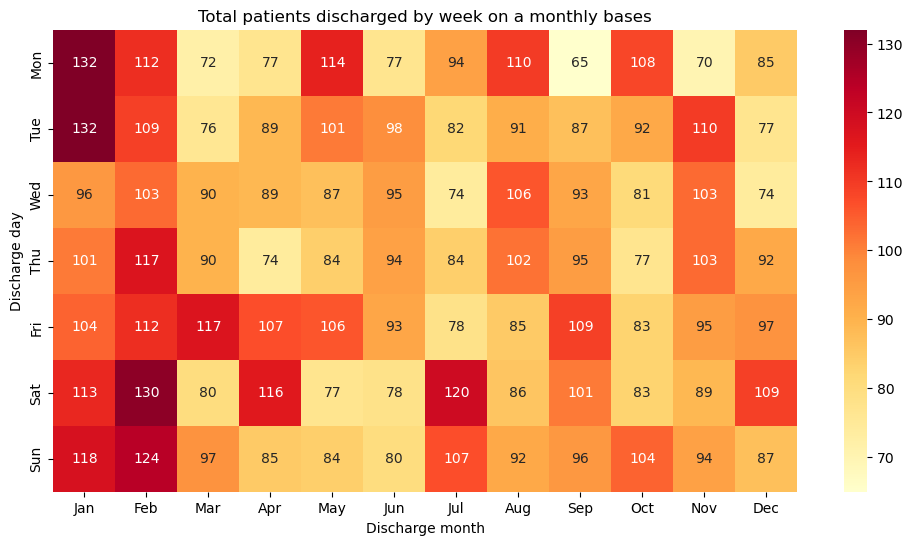

In [26]:
#extract the short day and month name
health_data['Discharge month'] = health_data['Discharge Date'].dt.strftime('%b')
health_data['Discharge day'] = health_data['Discharge Date'].dt.strftime('%a')

#Define proper order for month and abbreviated days

month_order = [
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

#Create a pivot table
Discharge_heatmap = health_data.pivot_table(
    index = 'Discharge day',
    columns = 'Discharge month',
    aggfunc = 'size',
    fill_value = 0
)
#correct reordr of heat map
Discharge_heatmap_sorted = Discharge_heatmap.reindex(index = day_order, columns =month_order)

#Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(Discharge_heatmap_sorted,annot=True, fmt='d' , cmap="YlOrRd")
plt.title('Total patients discharged by week on a monthly bases')
plt.show()

### What is the total number of patients admitted per week, month and year? Add a filter to filter the month by year

In [27]:
#create a new column
health_data['Admission day'] = health_data['Admission Date'].dt.strftime('%a')

#Group data by the day name and count admission
admission_by_day = health_data.groupby('Admission day').size()

#sort the name of day
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
admission_by_day=admission_by_day.reindex(day_order,fill_value=0)
admission_by_day

Admission day
Mon    1096
Tue    1087
Wed    1167
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

Admission day
Mon    1096
Tue    1087
Wed    1167
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

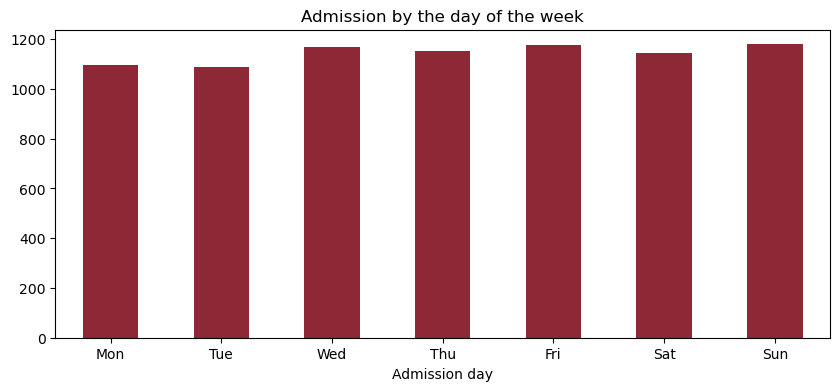

In [28]:
#Create a visual
admission_by_day.plot(kind='bar',color='#8D2837', figsize =(10,4))
plt.title('Admission by the day of the week')
plt.xticks(rotation = 0)
admission_by_day

In [29]:
#top 3 days with high admission
top_3_admission_day= health_data['Admission day'].value_counts().nlargest(3)
top_3_admission_day

Admission day
Sun    1179
Fri    1177
Wed    1167
Name: count, dtype: int64

In [30]:
#bottom 3 days with high admission
bottom_3_admission_day= health_data['Admission day'].value_counts().nsmallest(3)
bottom_3_admission_day

Admission day
Tue    1087
Mon    1096
Sat    1143
Name: count, dtype: int64

##### Total Admission by month filtered by year

In [34]:
#filter using the year od admission
selected_year = 2022
health_data_year = health_data[health_data['Admission Date'].dt.year == selected_year].copy()

# Add month number and name columns
health_data_year['Admission Month_num'] = health_data_year['Admission Date'].dt.month
health_data_year['Admission Month'] = health_data_year['Admission Date'].dt.strftime('%B')

# Total admission on monthly basis
monthly_admission = (
    health_data_year
    .groupby(['Admission Month', 'Admission Month_num'])
    .size()
    .reset_index(name='Total Patients')
    .sort_values('Admission Month_num')
)

print(f'Total patients admitted in the year {selected_year}')
monthly_admission

Total patients admitted in the year 2022


,Admission Month,Admission Month_num,Total Patients
4,January,1,351
3,February,2,291
7,March,3,313
0,April,4,327
8,May,5,349
6,June,6,315
5,July,7,327
1,August,8,329
11,September,9,311
10,October,10,311


##### Create a line chart to visualize it

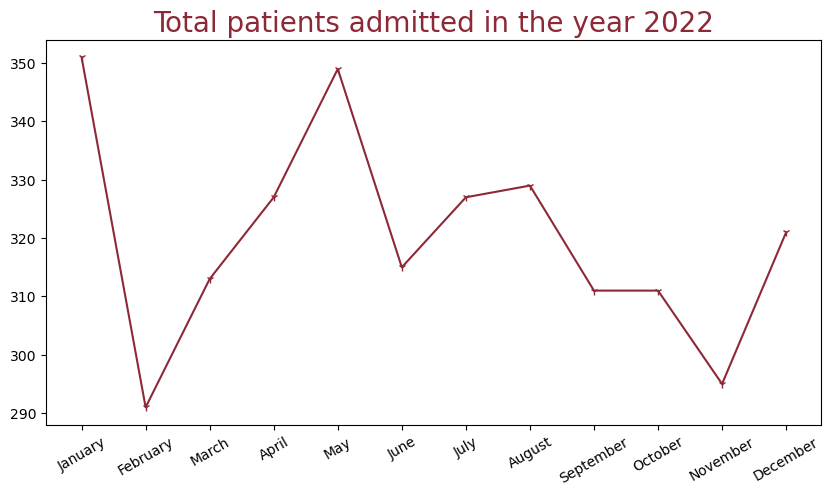

In [36]:
#setting the figure size
plt.figure(figsize =(10,5))

#Plotting the data
plt.plot(monthly_admission['Admission Month'], monthly_admission['Total Patients'],
         marker ='1',linestyle ='-', color ='#8D2837'
        )
plt.title(f"Total patients admitted in the year {selected_year}", fontsize=20, color='#8D2837')
plt.xticks(rotation=30)
plt.show()